# Linear Regression — Diabetes

**Goal:** Predict a continuous target (`disease progression`) using a linear regression model.

**Dataset:** `sklearn.datasets.load_diabetes` (10 features, 442 samples).

**What you'll see in this notebook**
- Quick EDA (distributions, correlations)
- Train/validation/test split
- Baseline Linear Regression
- Optional feature engineering (polynomial features)
- Metrics: RMSE, MAE, R²
- Learning curve to check over/underfitting

*Last updated: August 11, 2025*


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load dataset into a DataFrame
data = load_diabetes(as_frame=True)
df = data.frame.copy()
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Quick EDA

In [3]:
# Basic info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [4]:
# Feature/target split
X = df.drop(columns=['target'])
y = df['target']

# Correlation (quick glance)
corr = df.corr(numeric_only=True)
corr['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

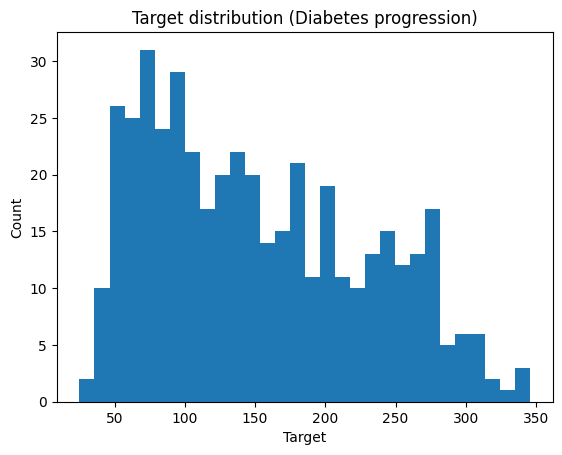

In [5]:
# Visualize target distribution
plt.figure()
plt.hist(y, bins=30)
plt.title("Target distribution (Diabetes progression)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

## Train/Validation/Test Split

In [6]:
# Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

X_train.shape, X_val.shape, X_test.shape

((264, 10), (89, 10), (89, 10))

## Baseline Linear Regression (with standardization)

In [7]:
linreg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

linreg.fit(X_train, y_train)
preds_val = linreg.predict(X_val)

mae = mean_absolute_error(y_val, preds_val)
rmse = mean_squared_error(y_val, preds_val, squared=False)
r2 = r2_score(y_val, preds_val)

print({"MAE": round(mae, 3), "RMSE": round(rmse, 3), "R2": round(r2, 3)})

TypeError: got an unexpected keyword argument 'squared'

## Optional: Polynomial Features

In [ ]:
poly = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

poly.fit(X_train, y_train)
preds_val_poly = poly.predict(X_val)

metrics_poly = {
    "MAE": mean_absolute_error(y_val, preds_val_poly),
    "RMSE": mean_squared_error(y_val, preds_val_poly, squared=False),
    "R2": r2_score(y_val, preds_val_poly)
}
{k: round(v, 3) for k, v in metrics_poly.items()}

## Final Evaluation on Test Set

In [ ]:
best_model = linreg if r2_score(y_val, preds_val) >= r2_score(y_val, preds_val_poly) else poly
best_name = "Linear Regression" if best_model is linreg else "Polynomial + Linear Regression"
print("Selected:", best_name)

preds_test = best_model.predict(X_test)
print({
    "MAE": round(mean_absolute_error(y_test, preds_test), 3),
    "RMSE": round(mean_squared_error(y_test, preds_test, squared=False), 3),
    "R2": round(r2_score(y_test, preds_test), 3)
})

## Learning Curve

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    linreg, X_trainval, y_trainval, cv=5, scoring="r2", n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, marker="o", label="Train R2")
plt.plot(train_sizes, val_mean, marker="s", label="CV R2")
plt.xlabel("Training examples")
plt.ylabel("R2 score")
plt.title("Learning Curve — Linear Regression")
plt.legend()
plt.show()